In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
tf.reset_default_graph() 

In [5]:
# DEFINE parameters
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = 98
neurons_hid4 = 49
neurons_hid5 = 25
neurons_hid6 = 12
neurons_hid7 = 6
neurons_hid8 = 3
neurons_hid9 = 2
neurons_hid10 = 1

learning_rate = 0.001

In [6]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [7]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [8]:
# TRANSPOSE OR PINV
tie_weight = tf.transpose #pinv

In [9]:
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs,neurons_hid1]), dtype=tf.float32)
w1_ = tie_weight(w1)
b1 = tf.Variable(tf.zeros([neurons_hid1]))

In [10]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
# act_func = lambda X:X
act_func = tf.nn.tanh

In [18]:
# LAYER MODELING OF :NN
# hid_layer1 = act_func(tf.matmul(X, w1)+b1)
v1 = tf.Variable(tf.random_uniform([neurons_hid1], 0.5,5))
hid_layer1 = v1*v1*act_func((tf.matmul(X, w1)+b1)/(v1*v1))

output_layer = tf.matmul(hid_layer1, w1_)

In [19]:
# LOSS FUNCTIONS
loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=yout))

In [30]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w1, b1])

opt2 = tf.train.GradientDescentOptimizer(learning_rate=10000)
train2 = optimizer.minimize(loss, var_list=[v1])

In [31]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [32]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: X_batch})
                sess.run(train2, feed_dict={X: X_batch})

            training_loss = loss.eval(feed_dict={X: X_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            print('v1 mean = ', np.mean(v1.eval()))
            print('  stdev = ', np.std(v1.eval()),'\n')
            
            saver.save(sess, "./save/ae_1_tanh_learn2.ckpt")      
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 0.0015711142914369702
v1 mean =  2.92829
  stdev =  1.2402611 

Epoch 1 Complete. Training Loss: 0.0007632229826413095
v1 mean =  2.9780226
  stdev =  1.2116517 

Epoch 2 Complete. Training Loss: 0.0005775904282927513
v1 mean =  3.0113614
  stdev =  1.1936454 

Epoch 3 Complete. Training Loss: 0.0004768084909301251
v1 mean =  3.0367017
  stdev =  1.1800871 

Epoch 4 Complete. Training Loss: 0.0004460405616555363
v1 mean =  3.0575585
  stdev =  1.1691703 

Keyboard Interrupted
Finished Training the Model


In [ ]:
'''
Problems
- v1 is always increasing
'''

In [40]:
num_test_images = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/ae_1_tanh_learn2.ckpt")
    
    results,compressed = sess.run([output_layer, hid_layer1],
                                  feed_dict={X:mnist.test.images[start_point:num_test_images+start_point]})
    weight1 = w1.eval()
    biases1 = b1.eval()
    linearity1 = v1.eval()

INFO:tensorflow:Restoring parameters from ./save/ae_1_tanh_learn2.ckpt


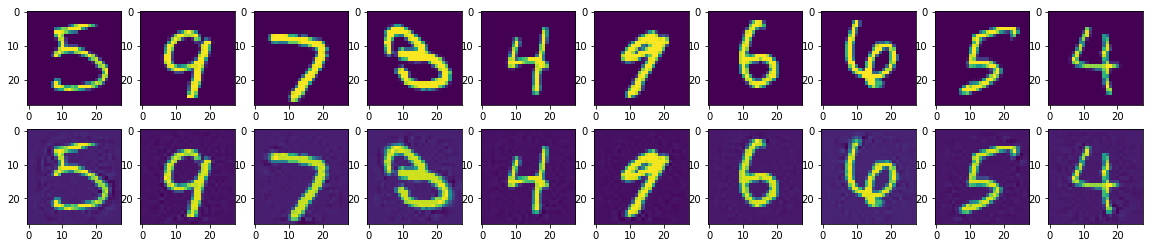

In [41]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(2, num_test_images, figsize=(20, 4))
for i in range(start_point,num_test_images+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][j].imshow(np.reshape(results[j], (28, 28)))

In [42]:
np.set_printoptions(precision=3, suppress=True)
print(linearity1)

[4.53  2.406 3.052 1.521 2.81  3.6   4.216 3.168 3.601 4.894 3.717 2.57
 3.324 2.299 3.703 6.566 3.59  4.085 2.586 3.253 1.75  2.75  1.764 4.799
 2.578 4.086 2.477 3.705 4.091 2.554 4.61  2.283 2.56  4.05  4.293 2.61
 3.937 2.313 2.906 1.559 2.394 6.443 1.823 3.919 3.637 3.322 2.441 2.835
 1.426 2.264 2.87  2.451 1.495 2.014 1.542 3.05  3.91  1.537 4.766 2.708
 1.407 2.294 4.64  4.943 4.266 4.105 5.712 2.694 4.455 2.883 6.721 3.937
 3.13  3.035 2.841 2.978 4.244 3.247 1.661 3.015 1.801 1.428 4.901 4.188
 3.143 1.686 3.054 1.438 2.878 2.722 2.063 1.473 3.895 2.944 3.578 4.803
 3.331 1.592 2.891 4.314 1.644 2.54  1.289 2.669 1.434 3.199 2.656 1.286
 3.219 1.43  4.587 4.992 3.604 3.944 1.566 4.32  2.939 2.638 1.611 5.314
 3.279 2.732 4.749 4.105 1.503 2.522 4.688 5.258 3.614 3.621 4.161 3.609
 1.582 2.474 5.033 3.683 4.189 2.699 4.96  4.379 3.216 2.801 2.248 4.706
 1.867 2.932 3.05  4.257 4.666 3.533 2.617 4.265 2.807 4.952 2.088 1.558
 2.16  4.202 3.261 4.564 2.364 3.615 4.052 1.837 2.48

In [28]:
# np.save('./save/weights/w1.npy',weight1)
#wt1 = np.load('./save/weights/w1.npy')